<a href="https://colab.research.google.com/github/pratyaksh12/Binary-Classification-with-PyTorch/blob/main/01_Binary_Classification_non_Linearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets try prediction of something non-linear or classification to be more precise

In [2]:
#import modules

import torch
from torch import nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [3]:
n_samples = 1000
X,y = make_circles(n_samples, noise = 0.03)

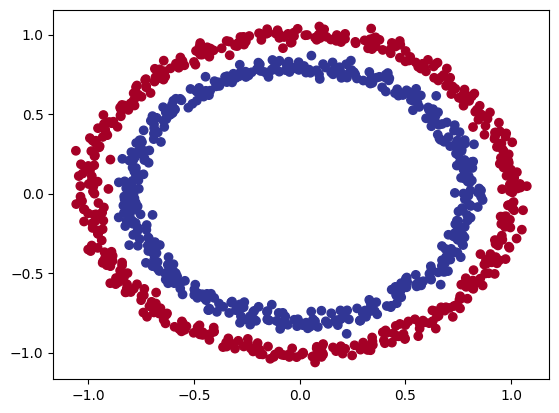

In [4]:
#visualising the dataset
plt.scatter(X[:,0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [5]:
#data looks good now lets convert the numpy arrays to tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [6]:
#split data for training, testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
#Defining the model
class GuessCircle(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x))).squeeze()

model_1 = GuessCircle()
model_1

GuessCircle(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
#lets select a loss function and an optimizer

loss_fn = nn.BCELoss()# good for binary classification
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)# why not?

In [50]:
def sigmoid(X: torch.Tensor) -> torch.Tensor:
  return 1/(1 + torch.exp(-X))

In [56]:
#make a training and testing loop

epochs = 1000

for epoch in range(epochs):
  #train the model
  model_1.train()

  #perform a forward pass
  y_pred_logit = model_1(X_train)

  #Converting raw logits to a prediction probability
  y_pred_label = sigmoid(y_pred_logit)

  #Calculate the loss
  loss = loss_fn(y_pred_label, y_train)

  #Zero-gradding
  optimizer.zero_grad()

  #Backward pass
  loss.backward()

  #Gradient descent
  optimizer.step()

  ##Training loop
  model_1.eval()

  with torch.inference_mode():
    y_test_logit = model_1(X_test)
    y_test_label = sigmoid(y_test_logit)

    loss_test = loss_fn(y_test_label, y_test)

    if epoch % 100 == 0:
      print(f"Epoch-No. = {epoch}, Loss = {loss}, Test-Loss = {loss_test}")

Epoch-No. = 0, Loss = 0.6929575204849243, Test-Loss = 0.6947299838066101
Epoch-No. = 100, Loss = 0.6929575204849243, Test-Loss = 0.694730818271637
Epoch-No. = 200, Loss = 0.6929575204849243, Test-Loss = 0.6947312951087952
Epoch-No. = 300, Loss = 0.6929575204849243, Test-Loss = 0.6947315335273743
Epoch-No. = 400, Loss = 0.6929575204849243, Test-Loss = 0.6947315335273743
Epoch-No. = 500, Loss = 0.6929576396942139, Test-Loss = 0.694731593132019
Epoch-No. = 600, Loss = 0.6929576396942139, Test-Loss = 0.6947316527366638
Epoch-No. = 700, Loss = 0.6929576396942139, Test-Loss = 0.694731593132019
Epoch-No. = 800, Loss = 0.6929576396942139, Test-Loss = 0.694731593132019
Epoch-No. = 900, Loss = 0.6929576396942139, Test-Loss = 0.694731593132019


In [52]:
import requests
from pathlib import Path

if Path('python_helper.py').is_file():
  print("File present")
else:
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('python_helper.py', 'wb') as f:
    f.write(request.content)

File present


In [53]:
from python_helper import plot_predictions, plot_decision_boundary

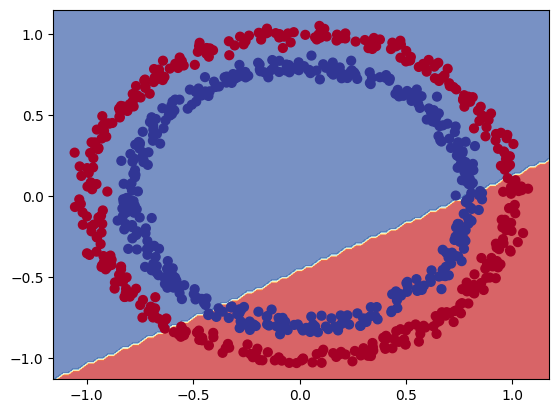

In [55]:
plot_decision_boundary(model_1, X_train, y_train)

##WTF this stupid model is literally guessing. I mean come on what's wrong?!

###After 1 hr of research the problem lies that i am unbable to let my model focus on something non-Linear

In [57]:
def Relu(X):
  return (X + torch.abs(X))/2

In [212]:
# ok lets recreate the model and fix this guessing issue

class GuessCircle2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer3(sigmoid(self.layer2(sigmoid(self.layer1(x))))).squeeze() # yeah this was what i was missing on Literally

model_2 = GuessCircle2()

In [213]:
model_2

GuessCircle2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [214]:
#defining a loss and optimizer

loss_fn = nn.BCEWithLogitsLoss() # yeah i dont want to use more sigmoid
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [215]:
#make a training and testing loop

epochs = 50000

for epoch in range(epochs):
  #train the model
  model_2.train()

  #perform a forward pass
  y_pred = model_2(X_train)

  #Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #Zero-gradding
  optimizer.zero_grad()

  #Backward pass
  loss.backward()

  #Gradient descent
  optimizer.step()

  ##Training loop
  model_2.eval()

  with torch.inference_mode():
    y_test_pred = model_2(X_test)
    loss_test = loss_fn(y_test_pred, y_test)

    if epoch % 500 == 0:
      print(f"Epoch-No. = {epoch}, Loss = {loss}, Test-Loss = {loss_test}")

Epoch-No. = 0, Loss = 0.717540979385376, Test-Loss = 0.7040153741836548
Epoch-No. = 500, Loss = 0.6930833458900452, Test-Loss = 0.6936728954315186
Epoch-No. = 1000, Loss = 0.6930750012397766, Test-Loss = 0.6936907172203064
Epoch-No. = 1500, Loss = 0.6930670142173767, Test-Loss = 0.6937084794044495
Epoch-No. = 2000, Loss = 0.6930592060089111, Test-Loss = 0.6937261819839478
Epoch-No. = 2500, Loss = 0.6930515766143799, Test-Loss = 0.6937436461448669
Epoch-No. = 3000, Loss = 0.6930440664291382, Test-Loss = 0.6937612295150757
Epoch-No. = 3500, Loss = 0.6930364966392517, Test-Loss = 0.6937787532806396
Epoch-No. = 4000, Loss = 0.6930292248725891, Test-Loss = 0.6937963366508484
Epoch-No. = 4500, Loss = 0.6930217742919922, Test-Loss = 0.6938140392303467
Epoch-No. = 5000, Loss = 0.6930144429206848, Test-Loss = 0.6938316822052002
Epoch-No. = 5500, Loss = 0.6930070519447327, Test-Loss = 0.6938496232032776
Epoch-No. = 6000, Loss = 0.6929996013641357, Test-Loss = 0.6938677430152893
Epoch-No. = 6500,

##The loss seems to be decreasing lets visualise this

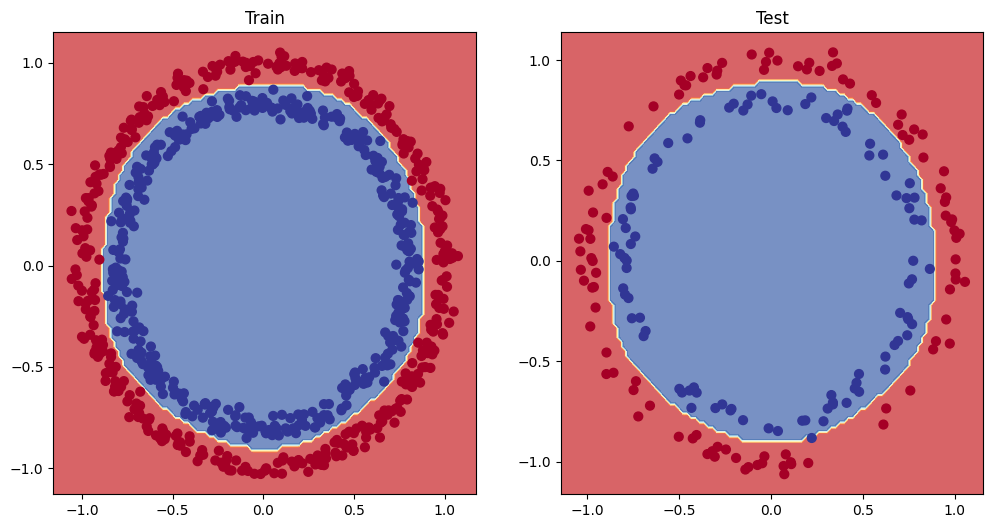

In [216]:
#Visualisation
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)


In [127]:
#seems good ig it took like 13000 x 4 epochs to get the accuracy to the one above

In [219]:
from sklearn.metrics import accuracy_score

model_2.eval()
with torch.inference_mode():
  y_pred = model_2(X_test)

#apparently PyTorch has sigmoid and ReLU lol
y_pred = torch.round(torch.sigmoid(y_pred)) # so im basically doing raw_logits -> prediction probability -> prediction label

In [220]:
acc = accuracy_score(y_test, y_pred)

In [221]:
acc # after like 52000 epochs

0.995

In [222]:
#model with pure PyTorch

class GuessCircle3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()# this is the part which makes it pure PyTorch. Don't judge....seriously
  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))).squeeze() # yeah this was what i was missing on Literally

model_3 = GuessCircle3()


In [223]:
#defining a loss and optimizer

loss_fn = nn.BCEWithLogitsLoss() # yeah i dont want to use more sigmoid
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)

In [224]:
epochs = 5000

for epoch in range(epochs):
  #train the model
  model_3.train()

  #perform a forward pass
  y_pred = model_3(X_train)

  #Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #Zero-gradding
  optimizer.zero_grad()

  #Backward pass
  loss.backward()

  #Gradient descent
  optimizer.step()

  ##Training loop
  model_3.eval()

  with torch.inference_mode():
    y_test_pred = model_3(X_test)
    loss_test = loss_fn(y_test_pred, y_test)

    if epoch % 500 == 0:
      print(f"Epoch-No. = {epoch}, Loss = {loss}, Test-Loss = {loss_test}")

Epoch-No. = 0, Loss = 0.7066286206245422, Test-Loss = 0.6976671814918518
Epoch-No. = 500, Loss = 0.6873815655708313, Test-Loss = 0.6864171624183655
Epoch-No. = 1000, Loss = 0.644575297832489, Test-Loss = 0.6421149969100952
Epoch-No. = 1500, Loss = 0.20108018815517426, Test-Loss = 0.20526090264320374
Epoch-No. = 2000, Loss = 0.04103907197713852, Test-Loss = 0.038028787821531296
Epoch-No. = 2500, Loss = 0.018453706055879593, Test-Loss = 0.01806672476232052
Epoch-No. = 3000, Loss = 0.011216227896511555, Test-Loss = 0.012928526848554611
Epoch-No. = 3500, Loss = 0.007975013926625252, Test-Loss = 0.010414579883217812
Epoch-No. = 4000, Loss = 0.006160861346870661, Test-Loss = 0.008595813065767288
Epoch-No. = 4500, Loss = 0.004993199836462736, Test-Loss = 0.007332572713494301


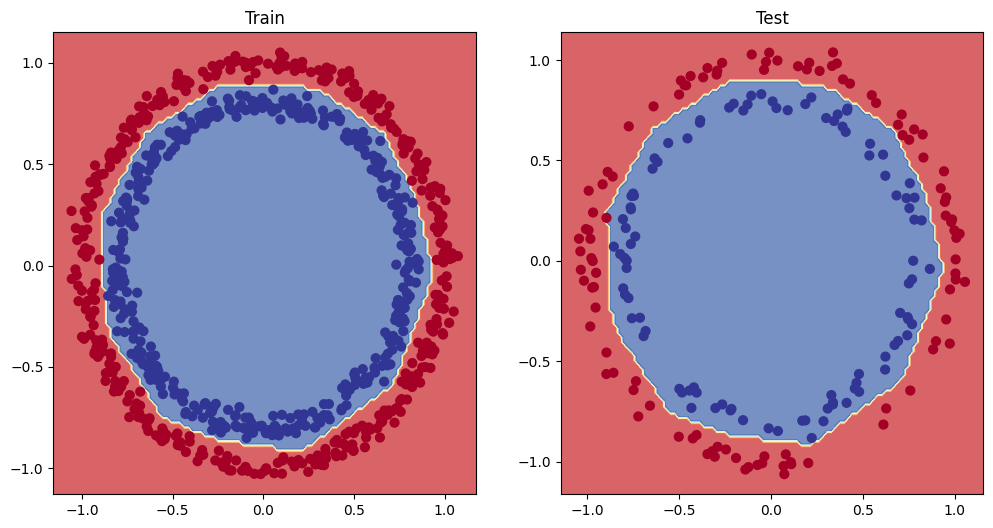

In [225]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


In [158]:
#the one with relu took like 5000 epochs for the result above that's insane

In [226]:
model_3.eval()
with torch.inference_mode():
  y_pred = model_3(X_test)

#apparently PyTorch has sigmoid and ReLU lol
y_pred = torch.round(torch.sigmoid(y_pred)) # so im basically doing raw_logits -> prediction probability -> prediction label

In [227]:
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [ ]:
# so in conclusion to fix the guessing you need a non-linear activation function which should fix the problem we encountered earlier
# plus ReLU activation function > Sigmoid just an opinion since the same result can be found with just changing the learning rate. Relu is computationally faster
# ReLU can cause Vanish Gradients howeve we can don't need to worry abput it since its a small nn and that issue can be fixed by using Leaky ReLU.